In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


def sigmoid_activation(x):
  return (1/(1+np.exp(-x)))

def derivative_sigmoid(y):
  return ((sigmoid_activation(y)*(1-sigmoid_activation(y))))

def error(target,calculated):
  return (calculated-target)

def relu(x):
  return np.maximum(0,x)

def derivative_relu(x):
  x[x<=0]=0
  x[x>0]=1
  return x

[[0.14559606 0.19119213]
 [0.25       0.28146854]]
[[0.0574652  0.0962531 ]
 [0.5        0.68981691]]
[[0.0701794 ]
 [1.03667788]]
[0.00290019]


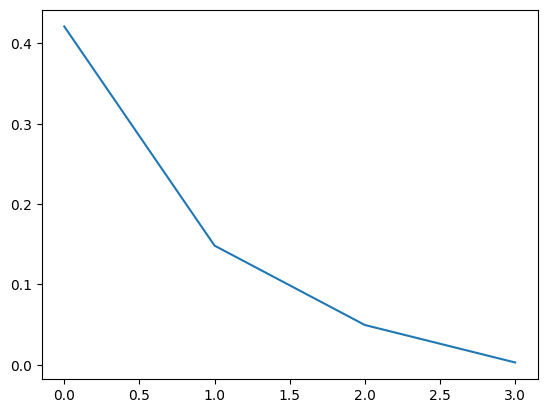

In [ ]:
W1=np.array([[0.15,0.20],[0.25,0.30]])

W2=np.array([[0.40,0.45],[0.50,0.55]])

b1=np.array([[0.35],[0.35]])
b2=np.array([[0.60],[0.60]])
X=np.array([[0.05],[0.10]])
target=np.array([[0.01],[0.99]])
changeinW2=np.zeros((2,2))
changeinW1=np.zeros((2,2))
W2_new=np.zeros((2,2))
W1_new=np.zeros((2,2))
error_list=[]
xpoints_list=[]
for k in range (0,4): #20085
  H1_in=(np.dot(W1,X))+b1

  H1_out=relu(H1_in)

  H1_derivative=derivative_relu(H1_in)

  H2_in=(np.dot(W2,H1_out))+b2

  H2_out=relu(H2_in)

  H2_derivative=derivative_relu(H2_in)

  Error01=(1/2)*((error(0.01,H2_out[0]))**2)
  Error02=(1/2)*((error(0.99,H2_out[1]))**2)
  TotalError=Error01+Error02
  error_list.append(TotalError)
  xpoints_list.append(k)
  for i in range(0,2):
    for j in range(0,2):
      h_out=H1_out[i][0]
      derivative = H2_derivative[j][0]
      errors=error(target[j][0],H2_out[j][0])
      changeinW2[i][j]=h_out*derivative*errors
    changeinW2=changeinW2.transpose()


  W2=W2-(0.5*changeinW2) #learning rate=0.5

  for i in range(0,2):
    for j in range(0,2):
      input=X[i][0]
      if (j==0):
        sum=(W2[0][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[0][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
      else:
        sum=(W2[1][0]*H2_derivative[0][0]*error(target[0][0],H2_out[0][0])) + (W2[1][1]*H2_derivative[1][0]*error(target[1][0],H2_out[1][0]))
      changeinW1[i][j]=input*H1_derivative[j][0]*sum
    #changeinW1[i][j]=input*H1_derivative[j][0]*((W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])) + (W2[i][j]*H2_derivative[j][0]*error(target[j][0],H2_out[j][0])))
    changeinW1=changeinW1.transpose()


  W1=W1-(0.5*changeinW1)

  biasderivative2 = H2_derivative[0][0]
  biaserrors2=error(target[0][0],H2_out[0][0])
  changeinB2=np.zeros((2,1))
  changeinB2[0][0]=biasderivative2*biaserrors2
  changeinB2[1][0]=biasderivative2*biaserrors2
  #print(changeinB2)
  b2=b2-(0.5*changeinB2)
  #print(b2) #new b2


  changeinB1=np.zeros((2,1))
  changeinB1[0][0]=(error(target[1][0],H2_out[0][0])*H2_derivative[0][0]*W2[1][0]*H1_derivative[1][0])+(error(target[1][0],H2_out[1][0])*H2_derivative[1][0]*W2[1][1]*H1_derivative[0][0])
  changeinB1[1][0]=(error(target[1][0],H2_out[0][0])*H2_derivative[0][0]*W2[1][0]*H1_derivative[1][0])+(error(target[1][0],H2_out[1][0])*H2_derivative[1][0]*W2[1][1]*H1_derivative[0][0])
  #print(changeinB1)
  b1=b1-(0.5*changeinB1)
  #print(b1) #new b1
# W1=W1_new
# W2=W2_new
print(W1)
print(W2)
print(H2_out)
print(error_list[-1])
xpoints = np.array(xpoints_list)
ypoints = np.array(error_list)

plt.plot(xpoints, ypoints)
plt.show()